In [265]:
%pylab inline
%load_ext autoreload
%autoreload 2

%aimport deepsvr

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [266]:
%matplotlib inline

In [267]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from analysis_utils.ClassifierPlots import create_reliability_diagram, create_roc_curve, create_feature_importance_plot
from analysis_utils.Analysis import print_accuracy_and_classification_report, predict_classes, get_somatic_error_type

sns.set_style("white")
sns.set_context('poster')

In [264]:
org=pd.read_pickle('data/training_data_preprocessed.pkl')
org

,call,disease_AML,disease_GST,disease_MPNST,disease_SCLC,disease_breast,disease_colorectal,disease_glioblastoma,disease_lymphoma,disease_melanoma,...,tumor_var_avg_distance_to_q2_start_in_q2_reads,tumor_var_avg_mapping_quality,tumor_var_avg_num_mismaches_as_fraction,tumor_var_avg_pos_as_fraction,tumor_var_avg_se_mapping_quality,tumor_var_avg_sum_mismatch_qualities,tumor_var_count,tumor_var_num_minus_strand,tumor_var_num_plus_strand,tumor_var_num_q2_containing_reads
fSsFJH1EY3AKAWF2 BER9Q2JBY3EPAWUcZUpOaAZCc0MRSRU=,a,1,0,0,0,0,0,0,0,0,...,0.377551,0.192667,0.057692,0.62,0.140667,0.215676,0.000990,0.001075,0.000806,0.000735
fSsFJH1EY3AKAWF2 BEV9RGJDY3UABGEcYkpMaAJNdkcXSQY=,s,1,0,0,0,0,0,0,0,0,...,0.479592,1.000000,0.019231,0.51,0.614833,0.074597,0.007054,0.006450,0.007258,0.006860
fSsFJH1EY3AKAWF2 BEV9RGJDZ3oMAWMcYkpMbA1Bc0UTSQY=,s,1,0,0,0,0,0,0,0,0,...,0.408163,1.000000,0.019231,0.53,0.616667,0.078946,0.003898,0.004192,0.003226,0.003553
fSsFJH1EY3AKAWF2 BEV9QmFCZXsLA2IcZElNbgxGcUN9SQY=,a,1,0,0,0,0,0,0,0,0,...,0.479592,0.483333,0.346154,0.96,0.483333,0.661405,0.000124,0.000000,0.000269,0.000245
fSsFJH1EY3AKAWF2 BEZ9RmNHanUOA2YBfElLaQ1DcEFnRwZ8eg==,a,1,0,0,0,0,0,0,0,0,...,0.122449,0.270000,0.096154,0.28,0.200000,0.302414,0.001547,0.001397,0.001613,0.001593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fSsJJ31OYnIJBWE= bU5zQ2lFYHQODHwFZUFKawNDfjBuIw==,s,0,0,0,1,0,0,0,0,0,...,0.551020,0.987000,0.019231,0.58,0.613333,0.080375,0.002475,0.000537,0.004704,0.004288
fSsJJ31OYnIJBWE= bU5yRGREYHcBAHwEYkxLawBMciNuNA==,s,0,0,0,1,0,0,0,0,0,...,0.408163,0.974500,0.019231,0.55,0.612000,0.079771,0.004455,0.004085,0.004570,0.004533
fSsJJ31OYnIJBWE= bU5yQmFGZHcKDHwEZElJbwBHfiNuNg==,s,0,0,0,1,0,0,0,0,0,...,0.387755,0.984500,0.038462,0.55,0.614333,0.099140,0.003589,0.003977,0.002823,0.003308
fSsJJ31OYnIJBWE= bU5xTmVHY3cMDXwHaE1IaABBfzBuNg==,s,0,0,0,1,0,0,0,0,0,...,0.418367,0.979000,0.019231,0.51,0.614500,0.079308,0.003775,0.003440,0.003898,0.004043


In [268]:
rf_imp_features = pd.read_pickle('data/random_forest/random_forest_feature_import.pkl')
gb_imp_features = pd.read_pickle('data/random_forest/gradient_boost_feature_import.pkl')


In [269]:
rf_imp_features

,feature,importance
0,disease_AML,0.010768
1,disease_GST,0.00016
2,disease_MPNST,0.000098
3,disease_SCLC,0.012362
4,disease_breast,0.017848
...,...,...
66,tumor_var_avg_sum_mismatch_qualities,0.046155
67,tumor_var_count,0.074482
68,tumor_var_num_minus_strand,0.040512
69,tumor_var_num_plus_strand,0.033731


In [270]:
gb_imp_features

,feature,importance
0,disease_AML,0.00956
1,disease_GST,0.00025
2,disease_MPNST,0.000139
3,disease_SCLC,0.008947
4,disease_breast,0.018832
...,...,...
66,tumor_var_avg_sum_mismatch_qualities,0.028304
67,tumor_var_count,0.09884
68,tumor_var_num_minus_strand,0.059036
69,tumor_var_num_plus_strand,0.054343


In [271]:
merged_df = rf_imp_features.merge(gb_imp_features, on='feature')


In [272]:
merged_df

,feature,importance_x,importance_y
0,disease_AML,0.010768,0.00956
1,disease_GST,0.00016,0.00025
2,disease_MPNST,0.000098,0.000139
3,disease_SCLC,0.012362,0.008947
4,disease_breast,0.017848,0.018832
...,...,...,...
66,tumor_var_avg_sum_mismatch_qualities,0.046155,0.028304
67,tumor_var_count,0.074482,0.09884
68,tumor_var_num_minus_strand,0.040512,0.059036
69,tumor_var_num_plus_strand,0.033731,0.054343


In [273]:
merged_df.rename(columns={'importance_x': 'Random Forest', 'importance_y': 'Gradient Boost'}, inplace=True)


In [274]:
merged_df

,feature,Random Forest,Gradient Boost
0,disease_AML,0.010768,0.00956
1,disease_GST,0.00016,0.00025
2,disease_MPNST,0.000098,0.000139
3,disease_SCLC,0.012362,0.008947
4,disease_breast,0.017848,0.018832
...,...,...,...
66,tumor_var_avg_sum_mismatch_qualities,0.046155,0.028304
67,tumor_var_count,0.074482,0.09884
68,tumor_var_num_minus_strand,0.040512,0.059036
69,tumor_var_num_plus_strand,0.033731,0.054343


In [275]:
merged_df = merged_df.sort_values(by='Random Forest', ascending=False)
merged_df

,feature,Random Forest,Gradient Boost
67,tumor_var_count,0.074482,0.09884
42,tumor_VAF,0.061398,0.052438
62,tumor_var_avg_mapping_quality,0.054612,0.081214
66,tumor_var_avg_sum_mismatch_qualities,0.046155,0.028304
63,tumor_var_avg_num_mismaches_as_fraction,0.042308,0.116365
...,...,...,...
40,reviewer_3,0.000664,0.000525
8,disease_melanoma,0.000578,0.001055
41,reviewer_4,0.000184,0.000227
1,disease_GST,0.00016,0.00025


In [276]:
print(merged_df)

                                    feature Random Forest Gradient Boost
67                          tumor_var_count      0.074482        0.09884
42                                tumor_VAF      0.061398       0.052438
62            tumor_var_avg_mapping_quality      0.054612       0.081214
66     tumor_var_avg_sum_mismatch_qualities      0.046155       0.028304
63  tumor_var_avg_num_mismaches_as_fraction      0.042308       0.116365
..                                      ...           ...            ...
40                               reviewer_3      0.000664       0.000525
8                          disease_melanoma      0.000578       0.001055
41                               reviewer_4      0.000184       0.000227
1                               disease_GST       0.00016        0.00025
2                             disease_MPNST      0.000098       0.000139

[71 rows x 3 columns]


In [277]:
merged_df['MeanScore'] = (merged_df['Random Forest'] + merged_df['Gradient Boost']) / 2

# Sort the dataframe based on the 'MeanScore' column in descending order
merged_df = merged_df.sort_values('MeanScore', ascending=False)

print(merged_df)


                                    feature Random Forest Gradient Boost  \
67                          tumor_var_count      0.074482        0.09884   
63  tumor_var_avg_num_mismaches_as_fraction      0.042308       0.116365   
62            tumor_var_avg_mapping_quality      0.054612       0.081214   
42                                tumor_VAF      0.061398       0.052438   
68               tumor_var_num_minus_strand      0.040512       0.059036   
..                                      ...           ...            ...   
8                          disease_melanoma      0.000578       0.001055   
40                               reviewer_3      0.000664       0.000525   
41                               reviewer_4      0.000184       0.000227   
1                               disease_GST       0.00016        0.00025   
2                             disease_MPNST      0.000098       0.000139   

   MeanScore  
67  0.086661  
63  0.079336  
62  0.067913  
42  0.056918  
68  0.049774

In [278]:
merged_df.set_index('feature', inplace=True)

<Axes: ylabel='feature'>

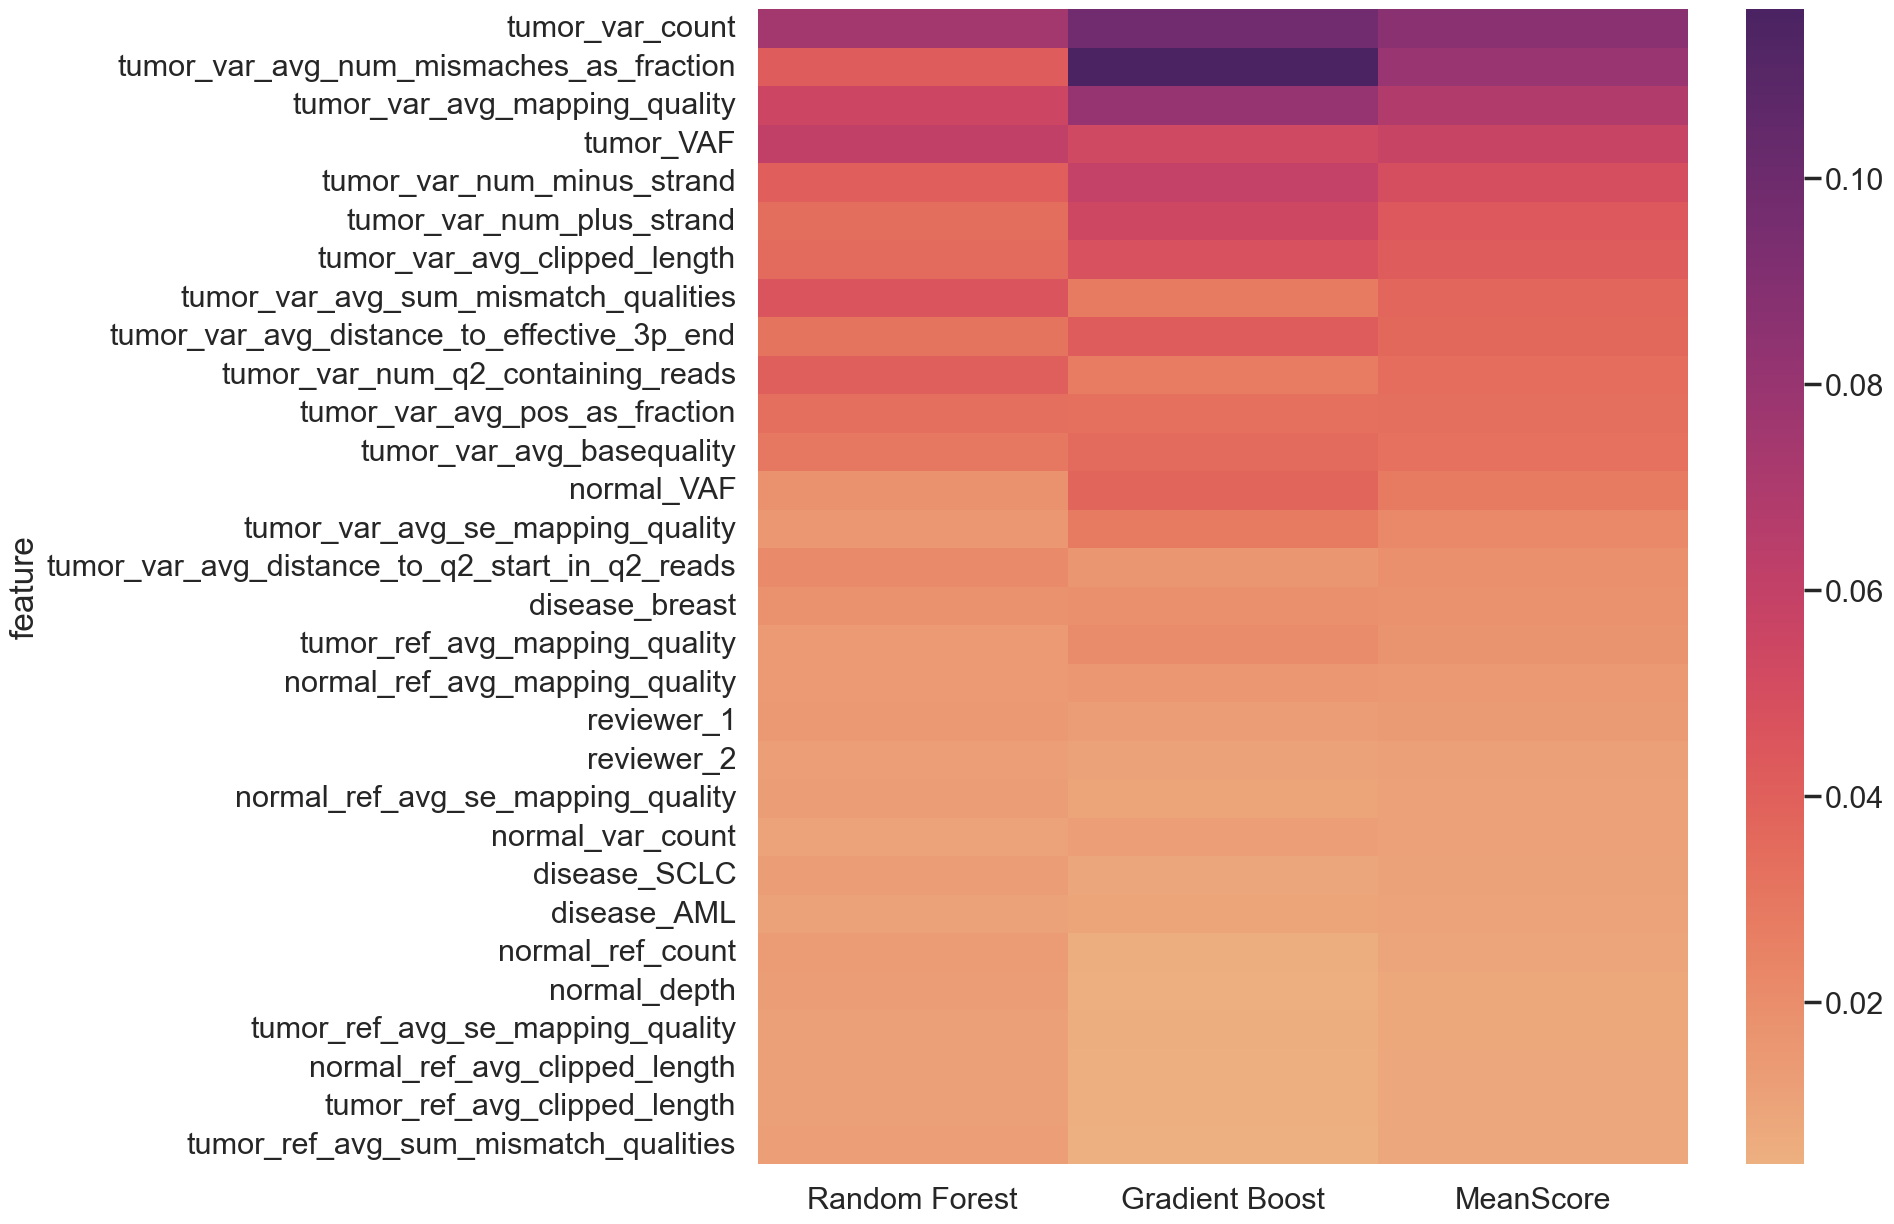

In [280]:
plt.rcParams["figure.figsize"]= [15,15]
mdf=merged_df.transpose()

mdf = mdf.apply(pd.to_numeric, errors='coerce')
merged_df=merged_df.head(30)
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')
sns.heatmap(merged_df,cmap='flare')